# **Python for Data Science Practice Session 4: Biochemistry**

RDKit? Sorting/Filtering - Images - Graphs (activity vs what?) Get a property using RDKit - ML? - Text - Comments - Narrative

Look through RDKit Guide and determine what other properties can be calculated.

Use coloured text formatting - make sure use of bold is effective - make questions challenging but attainable.

Review effectiveness of the code

**Explain Ki, Kd, IC50 and ED50**

# **Processing bioactivity data for ML**

### Background

**EGRF** is the **target** of an **anticancer** targeted therapy drug: **Tagrisso (Osimertinib)**. It was the seventh best-selling drug of 2020 with **$3.19 billion** in sales, and is used to treat non-small cell lung cancers where there is a specific mutation in the **EGRF** protein.

<center><img src="./biochem_images/carcinoma.gif" width="300" align="center"/>

                              Image above: Cell micrograph of a squamos Nonsmall-cell lung carcinoma
                                        Image below: Astrazeneca's Tagrisso in pill form

<table><tr>
<td> <img src="./biochem_images/tagrisso.jpg" alt="Tagrisso pill" style="width: 250px;"/> </td>
<td> <img src="./biochem_images/az_logo.png" alt="AZ Logo" style="width: 250px;"/> </td>
</tr></table>

Sources: -

https://www.fiercepharma.com/special-report/tagrisso-top-10-drugs-by-sales-increase-2020

https://en.wikipedia.org/wiki/Osimertinib

### This Notebook

This notebook will be focusing on the Epidermal Growth Factor Receptor (**EGRF**).

Image of compound here (ChemDraw) - - Image of protein - Draw in PYMOL?

Explanation of process

We will first import pandas and the ChEMBL web service package

In [6]:
pip install chembl_webresource_client

  Using cached chembl-webresource-client-0.10.2.tar.gz (51 kB)
  Using cached easydict-1.9.tar.gz (6.4 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached requests_cache-0.5.2-py2.py3-none-any.whl (22 kB)
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-py3-none-any.whl size=55661 sha256=9b22ec8647d528956745735a62e22bca93d34ff7e9c0ca2ac2efdb00b1564520
  Stored in directory: c:\users\ivan_\appdata\local\pip\cache\wheels\21\8c\3d\62f69d35e4b72cf761eff44234bbe2dcef1c615d4032dee84e
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6348 sha256=0e59d41dd69c5365e2dfed6a8d0363e3ce9293be91a8871ccaa87ae736ca218a
  Stored in directory: c:\users\ivan_\appdata\local\pip\cache\wheels\5d\79\e4\4e55effe206295359b37e0f9db3e68a1197ba396682807dadb
Successfully built chembl-webresource-client easydict
Note: you may need to restart the kernel to use updated packages.


In [7]:
#import pandas and the ChEMBL package
import pandas as pd
from chembl_webresource_client.new_client import new_client

<center><img src="./biochem_images/tagrisso.jpg" width="200" align="center"/>

In [143]:
#For google colab users
!pip install kora
import kora.install.rdkit

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [151]:
#Import the RDKit module - using Colab may be easier for this
import rdkit

### Importing ChEMBL data

In [9]:
#Search ChEMBL for the 'egfr' target - A growth factor receptor
#This will collate all possible results - we combine these into a pandas dataframe
target = new_client.target
target_query = target.search('egfr')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,9.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,7.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Epidermal growth factor receptor,4.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


In [10]:
#In this particular case CHEMBL3608 is the target we will use - index 0
select_target = targets.target_chembl_id[0]
select_target

'CHEMBL3608'

Link to target: https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL3608/

### Getting Activity data

Understaning the data you're working with is essential in order to draw meaningful conclusions from it. In the drug-discovery process **bioactivity** is an important property that can be determined experimentally. It is essentially a measure of...

In [149]:
#When attempting to make conclusions, bioactivity data is crucial
activity = new_client.activity
res = activity.filter(target_chembl_id = select_target).filter(standard_type="IC50")

In [12]:
df = pd.DataFrame.from_dict(res)

In [13]:
df.tail(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
66,Not Determined,18923658,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,None,None,None,None
67,None,18923668,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1100.0
68,None,18923669,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1300.0
69,None,18923670,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,700.0
70,Not Determined,18923671,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,None,None,None,None


In [14]:
#Not all column names are visible in the dataframe preview
#The code below will display all column names
#Use this as a reference
for col in df.columns:
    print(col)

activity_comment
activity_id
activity_properties
assay_chembl_id
assay_description
assay_type
assay_variant_accession
assay_variant_mutation
bao_endpoint
bao_format
bao_label
canonical_smiles
data_validity_comment
data_validity_description
document_chembl_id
document_journal
document_year
ligand_efficiency
molecule_chembl_id
molecule_pref_name
parent_molecule_chembl_id
pchembl_value
potential_duplicate
qudt_units
record_id
relation
src_id
standard_flag
standard_relation
standard_text_value
standard_type
standard_units
standard_upper_value
standard_value
target_chembl_id
target_organism
target_pref_name
target_tax_id
text_value
toid
type
units
uo_units
upper_value
value


In [15]:
#Use above
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [16]:
#Identify compounds with no activity data
#Display activity comment and molecule ID
missing_val = df.loc[df['activity_comment'] == 'Not Determined']
missing_val_clean = missing_val[['activity_comment', 'molecule_chembl_id']]
missing_val_clean

,activity_comment,molecule_chembl_id
47,Not Determined,CHEMBL184685
66,Not Determined,CHEMBL4591327
70,Not Determined,CHEMBL4444231


Looking at the last few columns in the bottom 5 rows we can see that **66** and **70** have **no IC50** values. In place of a value, **'None'** is displayed.

In [17]:
#Determining what units are used in our current dataset.
df.units.unique()

array(['uM', 'nM', 'ug ml-1', None], dtype=object)

### Missing Values

There are many ways of dealing with missing values, however in the case of the missing IC50 values in `df`, 2 of the compounds have IC50 values in a separate dataset `CHEMBL203`. This is also the 4th result in our initial target search.

In [18]:
#Selecting the CHEMBL203 target - index 3
select_target_2 = targets.target_chembl_id[3]
select_target_2

'CHEMBL203'

**Using the `filter` function select the molecule `CHEMBL4444231` and assign results to variable name `res_2`.**

**Note:** Just filtering by molecule name will yield 2 results, the IC50 value you are after is around 2000-3000. Select for this compund by filtering by an additional column.

CHEMBL4324121



In [19]:
#Filter for one of the target compunds
res_2 = activity.filter(target_chembl_id = select_target_2).filter(molecule_chembl_id="CHEMBL4444231",assay_variant_accession='P00533')

**Create a new dataframe, `df_2` from `res_2` using `pd.Dataframe.from_dict()`.**

In [20]:
#Create new dataframe from filter results
df_2 = pd.DataFrame.from_dict(res_2)

In [21]:
#Show contents
df_2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18923698,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2700.0


**Using the `filter` function select the molecule `CHEMBL4591327`.**

In [22]:
#When attempting to make conclusions, bioactivity data is crucial
res_3 = activity.filter(target_chembl_id = select_target_2).filter(molecule_chembl_id="CHEMBL4591327", assay_variant_accession ='P00533')

**Create a new dataframe, `df_3` from `res_3` using `pd.Dataframe.from_dict()`.**

In [23]:
#Create new dataframe from filter results
df_3 = pd.DataFrame.from_dict(res_3)

In [24]:
#Show contents
df_3

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18923697,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2100.0


The same cannot be done with `CHEMBL184685` as the activity data is not present in this dataset either.

We will next remove the compunds missing bioactivity data from `df`.

In [25]:
df_1 = df.drop(index=[47,66,70])

We can double-check that this has been done correctly...

In [26]:
missing_val_2 = df_1.loc[df['activity_comment'] == 'Not Determined']
missing_val_clean_2 = missing_val_2[['activity_comment', 'molecule_chembl_id']]
missing_val_clean_2

,activity_comment,molecule_chembl_id


### Combining Datasets

We would like to combine `df_1`, `df_2`, and `df_3` to complete our dataset.

**In the cell below, print the shapes of all 3 datasets. What method of comnbination might we use?**

In [27]:
#Print the 
print(df_1.shape, df_2.shape, df_3.shape)

(68, 45) (1, 45) (1, 45)


As all dataframes have the same number of columns (45) so they can all be combined using only **concatenation**. 

**Combine `df_1`, `df_2`, and `df_3` into a new dataframe called `df_full` using an appropriate combination method**

In [28]:
#Create a list containing dataframes to be combined
#Concatenate and rename new dataframe
frames = [df_1,df_2, df_3]
df_full = pd.concat(frames)
df_full

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,110221,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
1,None,113118,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
2,None,119387,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
3,None,133319,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,25.0
4,None,193384,[],CHEMBL675513,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,None,18923668,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1100.0
68,None,18923669,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1300.0
69,None,18923670,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,700.0
0,None,18923698,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2700.0


In [29]:
#Create a new dataframe only containing the columns: 'molecule_chembl_id', 'canonical_smiles', and'standard_value'
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df_complete = df_full[selection]

#The code below should reset the index values
df_complete = df_complete.reset_index(drop=True)
df_complete

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,100000.0
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,100000.0
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,100000.0
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,25000.0
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,70.0
...,...,...,...
65,CHEMBL4562138,Cc1cc2cc(n1)-c1cnn(C)c1OCCC[C@@H](C)CN1/C(=N/C...,1100.0
66,CHEMBL4519157,O=C1/N=C2\Nc3ccccc3N2CCCCCOc2ccccc2-c2cc1ccn2,1300.0
67,CHEMBL4532034,COc1ccncc1-c1cc(C(=O)/N=c2\[nH]c3ccccc3n2CC(C)...,700.0
68,CHEMBL4444231,CC(C)(O)Cn1/c(=N/C(=O)c2cccc(-c3cccnc3)c2)[nH]...,2700.0


### Creating a new column

In [30]:
#Create a new column for bioactivity class
#Looping through standard values and classifying them accordingly
      #Compounds which are activ/highly active might work as potential inhibitors?
bioactivity_class = []
for i in df_complete.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif 100 <= float(i) <= 1000:
        bioactivity_class.append("active")
    elif float(i) <= 100:
        bioactivity_class.append("highly active")
    else:
        bioactivity_class.append("intermediate")

In [32]:
#
df_complete_activity = pd.concat([df_complete,pd.Series(bioactivity_class)], axis=1)
df_complete_activity.rename(columns={0:'activity_class'}, inplace=True)

In [33]:
#
df_final = pd.DataFrame.from_dict(df_complete_activity)

In [34]:
#
df_final = df_final.loc[df_final['activity_class'].isin(['highly active'])]

In [35]:
#
df_final.dtypes

molecule_chembl_id    object
canonical_smiles      object
standard_value        object
activity_class        object
dtype: object

In [36]:
#
df_final.shape

(14, 4)

In [138]:
#
df_sorted = df_final.sort_values('standard_value', ascending=True)

#df_sorted = df_final.filter(like ='active', axis=0)
df_select = df_sorted.head(10)
df_select = df_select.reset_index(drop=True)
df_select

,molecule_chembl_id,canonical_smiles,standard_value,activity_class
0,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,0.0044,highly active
1,CHEMBL483830,O=C(O)c1cc(N(Cc2cc(O)ccc2O)Cc2cc(O)ccc2O)ccc1O,0.011,highly active
2,CHEMBL319620,O=C(O)c1cc(NCc2cc(O)ccc2O)ccc1O,0.012,highly active
3,CHEMBL483831,O=C(O)c1ccc(O)c(N(Cc2ccccc2O)Cc2cc(O)ccc2O)c1,0.17,highly active
4,CHEMBL47986,O=CN/C=C/c1cc(O)ccc1O,0.2,highly active
5,CHEMBL388978,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,0.35,highly active
6,CHEMBL485258,O=C(O)c1cc(N(Cc2ccccc2O)Cc2ccccc2O)ccc1O,0.49,highly active
7,CHEMBL520491,O=C(O)c1cc(/N=C\c2cc(O)ccc2O)ccc1O,0.76,highly active
8,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,2.7,highly active
9,CHEMBL243186,O=Cc1cc(O)ccc1O,33.0,highly active


In [139]:
#
df_select.iloc[:, -3]

0          O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O
1       O=C(O)c1cc(N(Cc2cc(O)ccc2O)Cc2cc(O)ccc2O)ccc1O
2                      O=C(O)c1cc(NCc2cc(O)ccc2O)ccc1O
3        O=C(O)c1ccc(O)c(N(Cc2ccccc2O)Cc2cc(O)ccc2O)c1
4                                O=CN/C=C/c1cc(O)ccc1O
5    CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...
6             O=C(O)c1cc(N(Cc2ccccc2O)Cc2ccccc2O)ccc1O
7                   O=C(O)c1cc(/N=C\c2cc(O)ccc2O)ccc1O
8                                 Nc1ccc(O)c(C(=O)O)c1
9                                      O=Cc1cc(O)ccc1O
Name: canonical_smiles, dtype: object

In [140]:
#
df_select.iloc[:, 0]

0    CHEMBL103552
1    CHEMBL483830
2    CHEMBL319620
3    CHEMBL483831
4     CHEMBL47986
5    CHEMBL388978
6    CHEMBL485258
7    CHEMBL520491
8       CHEMBL704
9    CHEMBL243186
Name: molecule_chembl_id, dtype: object

### Visualising Compounds with RDKit

In [150]:
#
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import RDLogger
from rdkit.Chem import Descriptors, Lipinski

In [142]:
#
IPythonConsole.ipython_useSVG=True

In [143]:
#
df_select.iloc[:, -3][0]

'O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O'

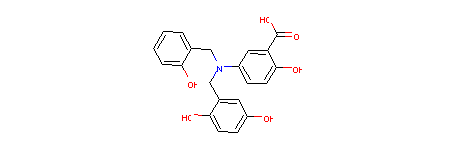

In [144]:
#
cpd_1 = Chem.MolFromSmiles(df_select.iloc[:, -3][0]) 
cpd_1

In [145]:
#
cpd_2 = Chem.MolFromSmiles(df_select.iloc[:, -3][1]) 
cpd_3 = Chem.MolFromSmiles(df_select.iloc[:, -3][2]) 
cpd_4 = Chem.MolFromSmiles(df_select.iloc[:, -3][3]) 
cpd_5 = Chem.MolFromSmiles(df_select.iloc[:, -3][4]) 
cpd_6 = Chem.MolFromSmiles(df_select.iloc[:, -3][5]) 
cpd_7 = Chem.MolFromSmiles(df_select.iloc[:, -3][6]) 
cpd_8 = Chem.MolFromSmiles(df_select.iloc[:, -3][7]) 
cpd_9 = Chem.MolFromSmiles(df_select.iloc[:, -3][8]) 
cpd_10 = Chem.MolFromSmiles(df_select.iloc[:, -3][9]) 

In [146]:
#
id1 = df_select.iloc[:, 0][0]
id2 = df_select.iloc[:, 0][1]
id3 = df_select.iloc[:, 0][2]
id4 = df_select.iloc[:, 0][3]
id5 = df_select.iloc[:, 0][4]
id6 = df_select.iloc[:, 0][5]
id7 = df_select.iloc[:, 0][6]
id8 = df_select.iloc[:, 0][7]
id9 = df_select.iloc[:, 0][8]
id10 = df_select.iloc[:, 0][9]

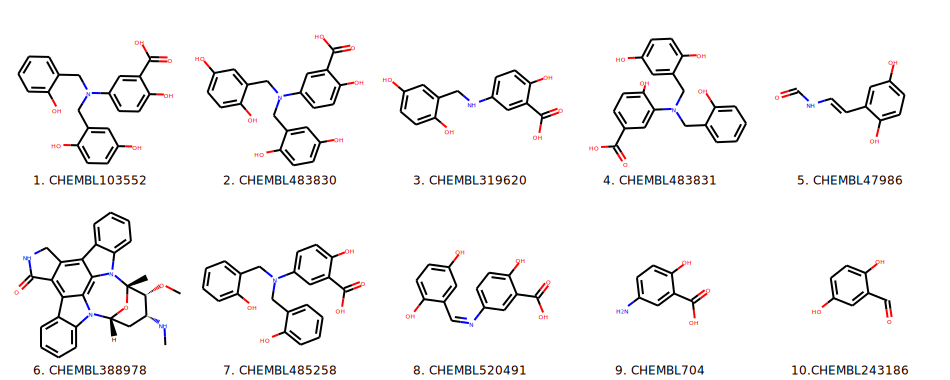

In [148]:
#
Draw.MolsToGridImage(
    (cpd_1, cpd_2, cpd_3, cpd_4, cpd_5, cpd_6, cpd_7, cpd_8, cpd_9, cpd_10),
    legends = ('1. ' + id1,'2. ' + id2,'3. ' + id3,'4. ' + id4,'5. ' + id5, 
               '6. ' + id6, '7. ' + id7, '8. ' + id8, '9. ' + id9, '10.'+id10),
    molsPerRow=5, subImgSize=(190,190)
)

**Tagrisso**, the drug used to target a mutated form of the **EGRF** protein has the SMILES formula below:-

`CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=C4)NC(=O)C=C)N(C)CCN(C)C)OC`

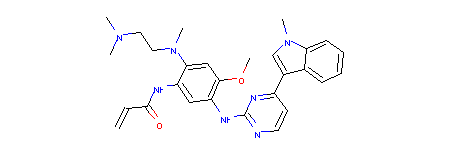

In [85]:
#
tgr = Chem.MolFromSmiles('CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=C4)NC(=O)C=C)N(C)CCN(C)C)OC') 
tgr

In [135]:
#
cpd_list = [cpd_1, cpd_2, cpd_3, cpd_4, cpd_5, cpd_6, cpd_7, cpd_8, cpd_9]
for x in cpd_list:
    ms = [x, tgr]
    fps = [Chem.RDKFingerprint(x) for x in ms]
    print(cpd_list.index(x)+1,'- ', round(DataStructs.FingerprintSimilarity(fps[0], fps[1]),4))
    

1 -  0.2725
2 -  0.2725
3 -  0.2283
4 -  0.2878
5 -  0.1316
6 -  0.5169
7 -  0.2621
8 -  0.2372
9 -  0.1505


Graphs, Lipinski, Next steps